# Achraf Safsafi
# DSC 680
# Speech Emotion Recognition 

# Data Understanding

In [1]:
# print files
import os

file_name = "Audio_Speech_Actors_01-24_"

filelist = []

for root, dirs, files in os.walk(file_name):
    for file in files:
        filelist.append(os.path.join(root,file))
for name in filelist:
    print(name)

Audio_Speech_Actors_01-24_\Actor_01\03-01-01-01-01-01-01.wav
Audio_Speech_Actors_01-24_\Actor_01\03-01-01-01-01-02-01.wav
Audio_Speech_Actors_01-24_\Actor_01\03-01-01-01-02-01-01.wav
Audio_Speech_Actors_01-24_\Actor_01\03-01-01-01-02-02-01.wav
Audio_Speech_Actors_01-24_\Actor_01\03-01-02-01-01-01-01.wav
Audio_Speech_Actors_01-24_\Actor_01\03-01-02-01-01-02-01.wav
Audio_Speech_Actors_01-24_\Actor_01\03-01-02-01-02-01-01.wav
Audio_Speech_Actors_01-24_\Actor_01\03-01-02-01-02-02-01.wav
Audio_Speech_Actors_01-24_\Actor_01\03-01-02-02-01-01-01.wav
Audio_Speech_Actors_01-24_\Actor_01\03-01-02-02-01-02-01.wav
Audio_Speech_Actors_01-24_\Actor_01\03-01-02-02-02-01-01.wav
Audio_Speech_Actors_01-24_\Actor_01\03-01-02-02-02-02-01.wav
Audio_Speech_Actors_01-24_\Actor_01\03-01-03-01-01-01-01.wav
Audio_Speech_Actors_01-24_\Actor_01\03-01-03-01-01-02-01.wav
Audio_Speech_Actors_01-24_\Actor_01\03-01-03-01-02-01-01.wav
Audio_Speech_Actors_01-24_\Actor_01\03-01-03-01-02-02-01.wav
Audio_Speech_Actors_01-2

In [2]:
# make files into dataframe

import pandas as pd
emotion = []
emotional_intensity = []
gender = []
actor = []
file_name =[]

for f in filelist: 
        part = f.split('-')
        emotion.append(int(part[3]))
        
        ei = int(part[4])
        if ei == 1:
            ei = "normal"
        else:
            ei = "strong"
        
        emotional_intensity.append(ei)
    
        a = int(part[7].split('.')[0])
        if a%2 == 0:
            a = "female"
        else:
            a = "male"
        actor.append(a)
        file_name.append(filelist)
        
        
df = pd.DataFrame(list(zip(filelist,actor,emotional_intensity,emotion))
                  ,columns=['file_name','actor','emotional_intensity','emotion'])

df["emotion"] = df["emotion"].replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry',
                                       6:'fear', 7:'disgust', 8:'surprise'})
df.head()       


,file_name,actor,emotional_intensity,emotion
0,Audio_Speech_Actors_01-24_\Actor_01\03-01-01-0...,male,normal,neutral
1,Audio_Speech_Actors_01-24_\Actor_01\03-01-01-0...,male,normal,neutral
2,Audio_Speech_Actors_01-24_\Actor_01\03-01-01-0...,male,normal,neutral
3,Audio_Speech_Actors_01-24_\Actor_01\03-01-01-0...,male,normal,neutral
4,Audio_Speech_Actors_01-24_\Actor_01\03-01-02-0...,male,normal,calm


In [3]:
df["emotion"]

0        neutral
1        neutral
2        neutral
3        neutral
4           calm
          ...   
1435    surprise
1436    surprise
1437    surprise
1438    surprise
1439    surprise
Name: emotion, Length: 1440, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   file_name            1440 non-null   object
 1   actor                1440 non-null   object
 2   emotional_intensity  1440 non-null   object
 3   emotion              1440 non-null   object
dtypes: object(4)
memory usage: 45.1+ KB


happy       192
fear        192
surprise    192
angry       192
calm        192
sad         192
disgust     192
neutral      96
Name: emotion, dtype: int64

<Figure size 1440x1440 with 0 Axes>

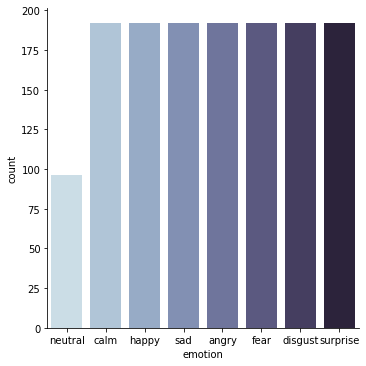

In [5]:
#class distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20)) 
sns.catplot(x="emotion", kind="count", palette="ch:s=.25,rot=-.25",data=df)

df.emotion.value_counts()


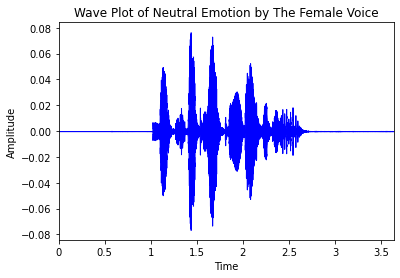

In [6]:
# explore data
import librosa
import librosa.display

f= r'Audio_Speech_Actors_01-24_\Actor_02\03-01-01-01-01-01-02.wav'

x, sr = librosa.load(f)
plt.title("Wave Plot of Neutral Emotion by The Female Voice")
plt.ylabel("Amplitude")
librosa.display.waveplot(x, sr=sr, color="b")


import IPython.display as ipd
ipd.Audio(f) 


# Data Preparation

In [7]:
#feature extraction using  mfccs

import numpy as np
df1 = pd.DataFrame(columns=['feature'])

i=0
for index,file in enumerate(df.file_name):
    x, sr = librosa.load(file,res_type='kaiser_fast', duration=2.5, offset=0.5) 
    mfccs = np.mean(librosa.feature.mfcc(y=x,sr=sr, n_mfcc=40).T,axis=0)
    df1.loc[i] = [mfccs]
    i=i+1   

print(len(df1))
df1.head()

1440


,feature
0,"[-649.32654, 77.5528, -4.0142827, 21.153275, 5..."
1,"[-638.2116, 77.39209, -7.99876, 25.096218, 5.9..."
2,"[-646.4801, 78.82883, -5.732299, 20.642467, 1...."
3,"[-647.75415, 73.650444, -1.4133093, 20.91033, ..."
4,"[-656.4784, 92.891365, -2.4497633, 25.932564, ..."


In [8]:
#print new dataframe with extracted features
df2 = pd.DataFrame(df1['feature'].tolist())
df2['label'] = df["emotion"]
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
0,-649.326538,77.552803,-4.014283,21.153275,5.655547,5.056686,-8.490706,-0.343246,-18.199919,-0.474830,...,-3.646173,-2.677705,-3.368088,-3.341541,-2.997198,-0.483260,-3.265112,-3.683365,-2.961608,neutral
1,-638.211609,77.392090,-7.998760,25.096218,5.944836,3.384823,-7.117987,-3.876897,-19.997583,0.837479,...,-4.248132,-2.338756,-3.990740,-3.476139,-1.776876,-1.057908,-4.814154,-3.602708,-3.767285,neutral
2,-646.480103,78.828827,-5.732299,20.642467,1.353340,4.329074,-7.900001,-4.589318,-17.974184,-2.710130,...,-3.502535,-2.627358,-3.244352,-3.090812,-3.374344,-0.907987,-4.326653,-4.007297,-3.715017,neutral
3,-647.754150,73.650444,-1.413309,20.910330,3.687549,6.610001,-6.039933,-4.645039,-16.264578,-1.838561,...,-3.593392,-3.325768,-3.901699,-3.126809,-2.391597,-0.773741,-3.903723,-3.625107,-4.866899,neutral
4,-656.478394,92.891365,-2.449763,25.932564,5.224689,7.001186,-10.262885,-1.490399,-18.754969,-3.515972,...,-2.561741,-1.868419,-4.370758,-1.645776,-1.541913,-1.662046,-3.418115,-4.580522,-4.830294,calm



# Modeling

### Machine learning Models

In [9]:

##setup Classification module
from pycaret.classification import *

_exp_mclf101 = setup(data = df2, target = 'label', session_id=123,normalize = True,train_size=0.80,fold =10,
                     remove_multicollinearity = True) 


,Description,Value
0,session_id,123
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,"angry: 0, calm: 1, disgust: 2, fear: 3, happy: 4, neutral: 5, sad: 6, surprise: 7"
4,Original Data,"(1440, 41)"
5,Missing Values,False
6,Numeric Features,40
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
models = compare_models(include = ['et', 'rf', 'lightgbm',"mlp"],round= 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.64,0.91,0.63,0.66,0.64,0.59,0.59,2.92
mlp,MLP Classifier,0.64,0.92,0.63,0.65,0.64,0.59,0.59,3.88
lightgbm,Light Gradient Boosting Machine,0.62,0.91,0.61,0.64,0.62,0.57,0.57,2.98
rf,Random Forest Classifier,0.61,0.90,0.59,0.63,0.60,0.55,0.56,0.55


### 1D CNN

In [11]:
X_train = get_config(variable="X_train")
X_test = get_config(variable="X_test")
y_train = get_config(variable="y_train")
y_test = get_config(variable="y_test")

In [12]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [13]:
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis] 

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout


In [15]:


model = Sequential()


model.add(Conv1D(filters=16, kernel_size=7,padding="same",activation="relu",input_shape=(40, 1)))
model.add(MaxPooling1D(pool_size=2 ))
model.add(Dropout(0.1))

model.add(Conv1D(filters=32, kernel_size=7,padding="same",activation="relu"))
model.add(MaxPooling1D(pool_size=2 ))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(10, activation ='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))



opt = keras.optimizers.Adamax(learning_rate=0.0007)
model.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = opt,
                  metrics = ['accuracy'])


history = model.fit(X_train, y_train,
              batch_size = 32,
              epochs =2000,
              verbose = 1,
              validation_data = (X_test, y_test))




Epoch 1/2000
36/36 [==============================] - 7s 160ms/step - loss: 2.2922 - accuracy: 0.1278 - val_loss: 2.2099 - val_accuracy: 0.1632
Epoch 2/2000
36/36 [==============================] - 0s 10ms/step - loss: 2.2309 - accuracy: 0.1425 - val_loss: 2.1709 - val_accuracy: 0.1736
Epoch 3/2000
36/36 [==============================] - 0s 9ms/step - loss: 2.1918 - accuracy: 0.1756 - val_loss: 2.1443 - val_accuracy: 0.1771
Epoch 4/2000
36/36 [==============================] - 1s 17ms/step - loss: 2.1764 - accuracy: 0.1826 - val_loss: 2.1216 - val_accuracy: 0.2014
Epoch 5/2000
36/36 [==============================] - 0s 9ms/step - loss: 2.1668 - accuracy: 0.1882 - val_loss: 2.0973 - val_accuracy: 0.1944
Epoch 6/2000
36/36 [==============================] - 0s 9ms/step - loss: 2.1189 - accuracy: 0.1929 - val_loss: 2.0788 - val_accuracy: 0.2292
Epoch 7/2000
36/36 [==============================] - 0s 9ms/step - loss: 2.1099 - accuracy: 0.1751 - val_loss: 2.0575 - val_accuracy: 0.2188
Ep

### Plotting results

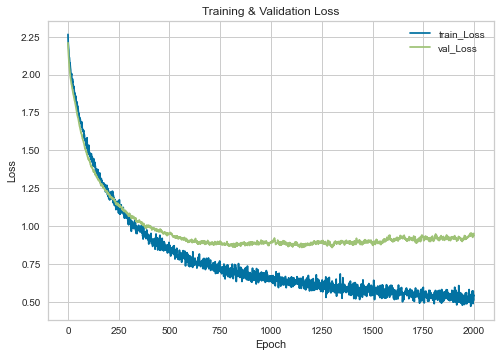

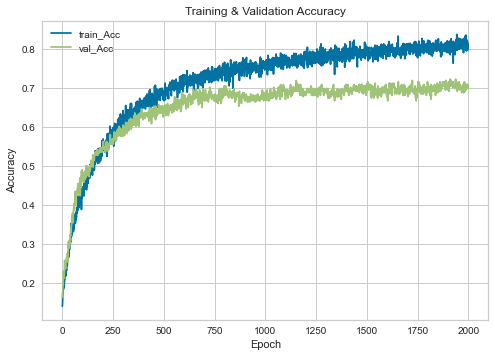

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training & Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['train_Loss', 'val_Loss'], loc='upper right')
plt.show()



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['train_Acc', 'val_Acc'], loc='upper left')
plt.show()
